# Visualisation
A short notebook to produce figures for the report

In [4]:
import numpy as np
import random
from pysat.solvers import Solver
from collections import deque
from scipy.ndimage import label
from scipy.spatial import distance
import matplotlib.pyplot as plt
import itertools 
import z3
import json
import os

In [5]:
data = np.load("star_battle_dataset.npz", allow_pickle=True)
puzzles = data["puzzles"]
solutions = data["solutions"]

In [ ]:
def visualize_star_battle(puzzle, solution=None):
    size = len(puzzle)
    
    if isinstance(puzzle, np.ndarray):
        puzzle = puzzle.tolist()
    if solution is not None and isinstance(solution, np.ndarray):
        solution = solution.tolist()

    fig, ax = plt.subplots(figsize=(5, 5))

    # Create a grid
    for x in range(size + 1):
        ax.plot([x, x], [0, size], 'k', lw=1) 
        ax.plot([0, size], [x, x], 'k', lw=1) 

    # colour regions
    region_colors = {}
    color_map = plt.cm.tab20c
    unique_regions = sorted(set(cell for row in puzzle for cell in row))

    for idx, region in enumerate(unique_regions):
        region_colors[region] = color_map(idx / len(unique_regions))

    for row in range(size):
        for col in range(size):
            region = puzzle[row][col]
            ax.add_patch(plt.Rectangle((col, size - row - 1), 1, 1, color=region_colors[region], alpha=0.5))
            
            if solution and solution[row][col] == '1':
                ax.text(col + 0.5, size - row - 0.5, '★', fontsize=16, ha='center', va='center', color='black')
            elif solution and solution[row][col] == '3':
                ax.text(col + 0.5, size - row - 0.5, 'X', fontsize=16, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    plt.show()


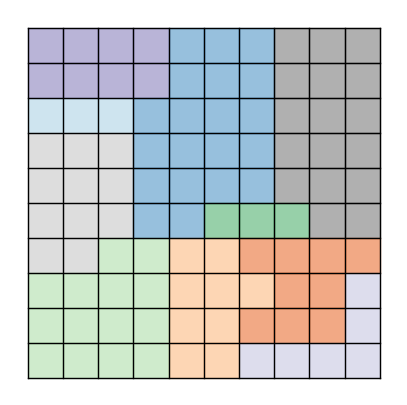

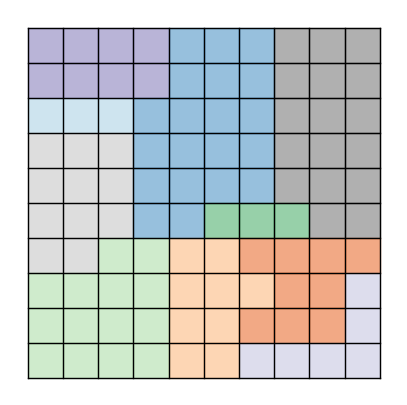

In [33]:
visualize_star_battle(puzzles[0])
visualize_star_battle(puzzles[0],solutions[0])

In [31]:
puzzle = [
 ['0', '1', '2', '2', '2'],
 ['0', '1', '2', '2', '3'],
 ['0', '0', '2', '3', '3'],
 ['4', '2', '2', '3', '3'],
 ['4', '4', '4', '3', '3']
 ]

solution = [
 ['0', '1', '0', '0', '0'],
 ['0', '0', '0', '1', '0'],
 ['1', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '1'],
 ['0', '0', '1', '0', '0']
]

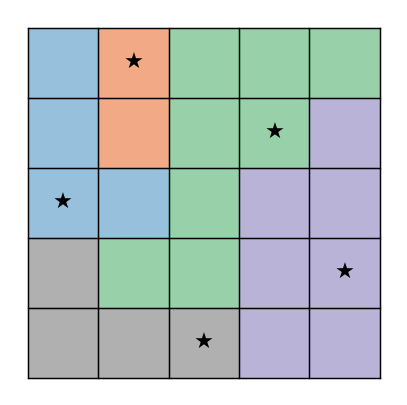

In [32]:
visualize_star_battle(puzzle, solution)

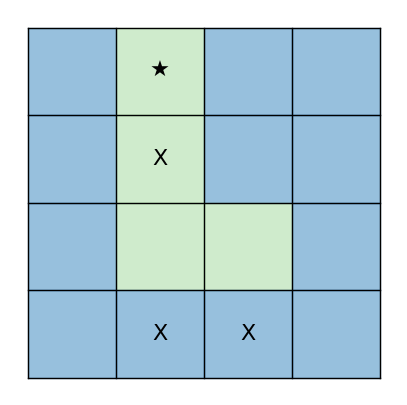

In [30]:
puzzle = [
 ['0', '4', '0', '0'],
 ['0', '4', '0', '0'],
 ['0', '4', '4', '0'],
 ['0', '0', '0', '0'],
 ]

solution = [
 ['0', '1', '0', '0'],
 ['0', '3', '0', '0'],
 ['0', '0', '0', '0'],
 ['0', '3', '3', '0'],
 ]
visualize_star_battle(puzzle,solution)

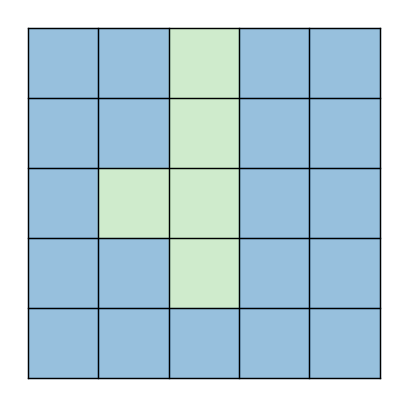

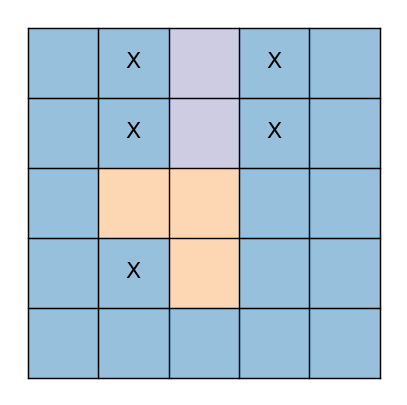

In [42]:
#clumping pictures
puzzle = [
    ['0', '0', '4', '0', '0'],
    ['0', '0', '4', '0', '0'],
    ['0', '4', '4', '0', '0'],
    ['0', '0', '4', '0', '0'],
    ['0', '0', '0', '0', '0']
]
puzzle2 = [
    ['0', '0', '6', '0', '0'],
    ['0', '0', '6', '0', '0'],
    ['0', '5', '5', '0', '0'],
    ['0', '0', '5', '0', '0'],
    ['0', '0', '0', '0', '0']
]

solution = [
    ['0', '3', '0', '3', '0'],
    ['0', '3', '0', '3', '0'],
    ['0', '0', '0', '0', '0'],
    ['0', '3', '0', '0', '0'],
    ['0', '0', '0', '0', '0']
]
visualize_star_battle(puzzle)
visualize_star_battle(puzzle2,solution)

